# Exploring the NASDAQOMX commoditiy indices

In [1]:
library(tidyverse)
library(ggthemes)
library(odbc)
library(plutoR)
library(quantmod)
library(PerformanceAnalytics)

options("scipen"=999)
options(stringsAsFactors = FALSE)
options(repr.plot.width=16, repr.plot.height=8)

source("config.R")
source("goofy/plot.common.R")
source("goofy/misc.common.R")

nasdaqOmx <- NasdaqOmx()

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend

Registering fonts with R

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


Attaching package

In [2]:
nasdaqOmx$Meta() %>%
    inner_join(nasdaqOmx$TimeSeries()) %>%
    group_by(ID, NAME) %>%
    filter(NAME %like% '% Commodity %') %>%
    summarize(ST = min(TIME_STAMP), ET = max(TIME_STAMP)) %>%
    arrange(NAME) %>%
    print(n = Inf)

Joining, by = "ID"
Warning message:
“Missing values are always removed in SQL.
Use `MIN(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”Warning message:
“Missing values are always removed in SQL.
Use `MAX(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”

# Source:     lazy query [?? x 4]
# Database:   Microsoft SQL Server 13.00.4224[ro1@NORWAY/StockVizUs2]
# Groups:     ID
# Ordered by: NAME
         ID NAME                                           ST         ET        
      <int> <chr>                                          <date>     <date>    
 1 13143745 NASDAQ Commodity Agriculture Index TR (NQCIAC… 2012-04-16 2019-07-08
 2 13143747 NASDAQ Commodity Aluminum Index TR (NQCIALTR)  2012-04-16 2019-07-08
 3 13143750 NASDAQ Commodity Benchmark Index TR (NQCITR)   2012-04-16 2019-07-08
 4 13143753 NASDAQ Commodity Brent Crude Index TR (NQCICB… 2012-04-16 2019-07-08
 5 13143755 NASDAQ Commodity Cocoa Index TR (NQCICCTR)     2012-04-16 2019-07-08
 6 13143757 NASDAQ Commodity Coffee Index TR (NQCIKCTR)    2012-04-16 2019-07-08
 7 13143759 NASDAQ Commodity Copper Index TR (NQCICUTR)    2012-04-16 2019-07-08
 8 13143761 NASDAQ Commodity Corn Index TR (NQCICTR)       2012-04-16 2019-07-08
 9 13143770 NASDAQ Commodity Cotton Index TR (NQCI

### coffee or sugar?

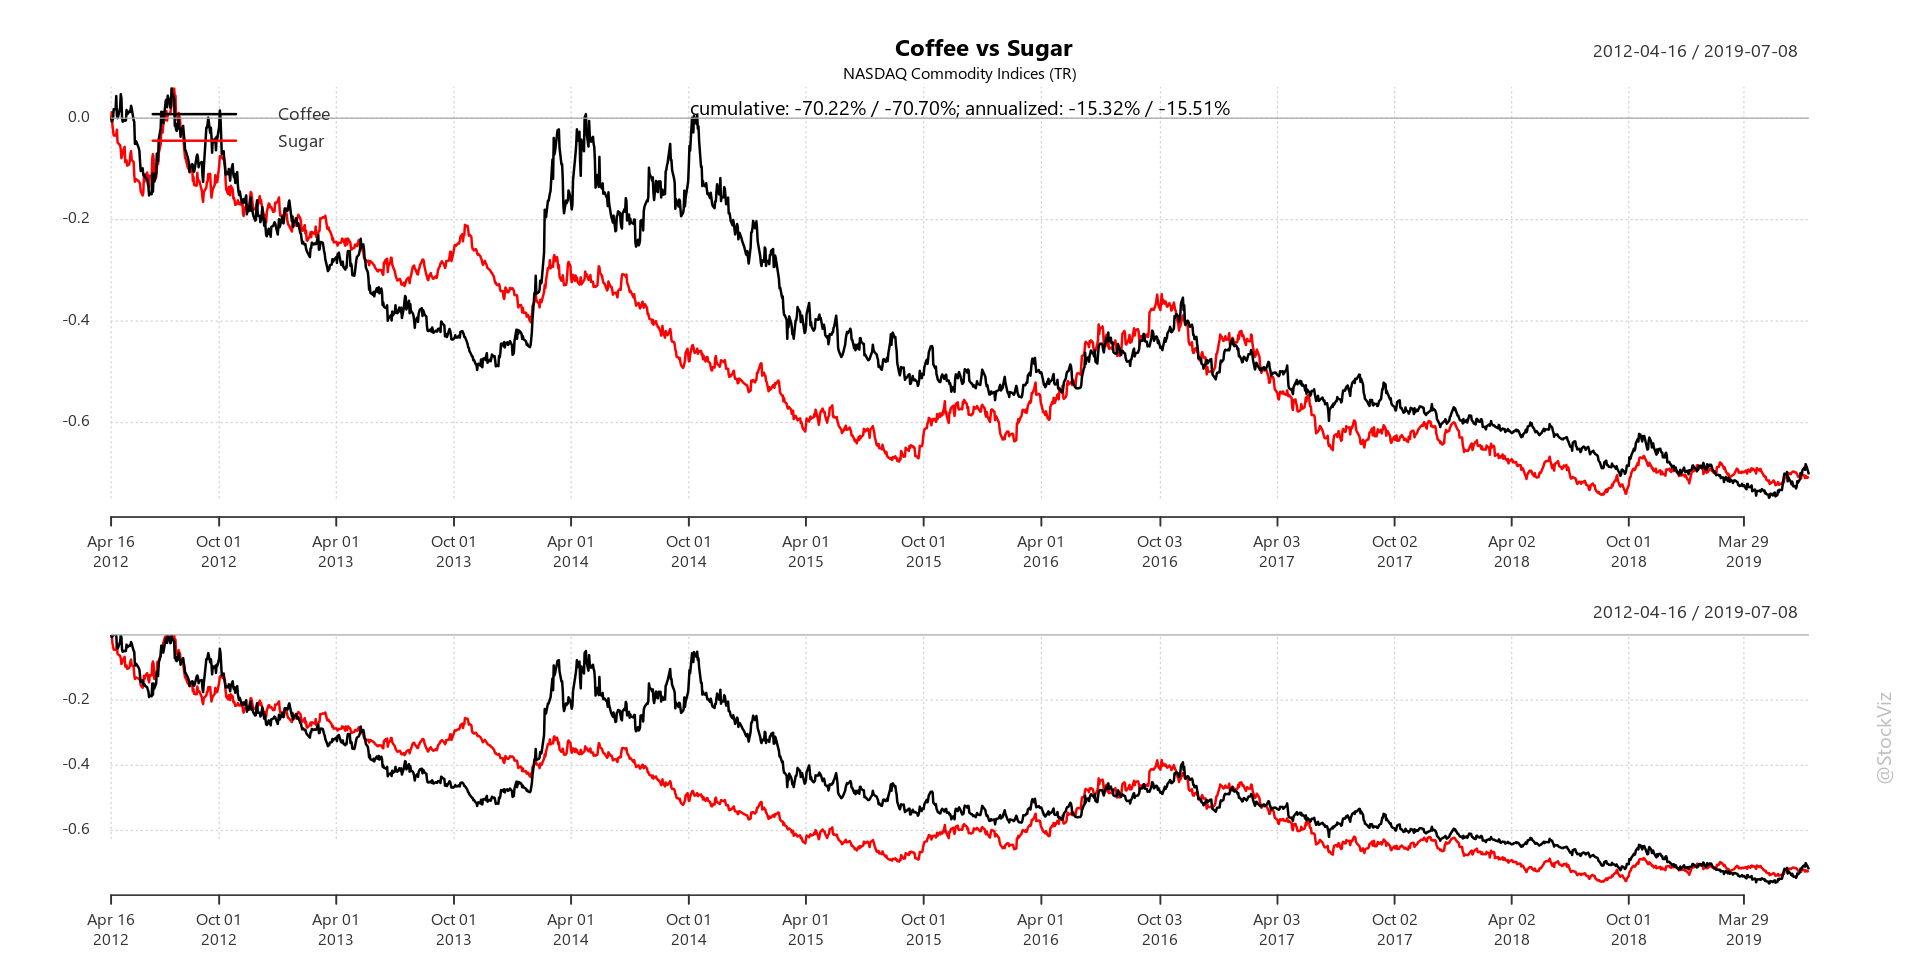

In [3]:
id1 <- 13143757 #NASDAQ Commodity Coffee Index TR (NQCIKCTR)
id2 <- 13143829 #NASDAQ Commodity Sugar Index TR (NQCISBTR)

name1 <- 'Coffee'
name2 <- 'Sugar'

nqVals1 <- nasdaqOmx$TimeSeries() %>%
    filter(ID == id1) %>%
    select(TIME_STAMP, CLOSE) %>%
    collect()

nqVals2 <- nasdaqOmx$TimeSeries() %>%
    filter(ID == id2) %>%
    select(TIME_STAMP, CLOSE) %>%
    collect()

nqRets <- merge(dailyReturn(xts(nqVals1$CLOSE, nqVals1$TIME_STAMP)), dailyReturn(xts(nqVals2$CLOSE, nqVals2$TIME_STAMP)))
names(nqRets) <- c(name1, name2)

Common.PlotCumReturns(nqRets, sprintf("%s vs %s", name1, name2), "NASDAQ Commodity Indices (TR)")

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)